In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data: https://vitaldb.net/dataset/

In [2]:
cases = pd.read_csv('data/cases.csv')
results = pd.read_csv('data/results.csv')
trks = pd.read_csv('data/trks.csv')
viz = pd.read_csv('data/viz_cases.csv')

In [3]:
cases.head()

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100


In [4]:
results.head()

,caseid,dt,name,result
0,1,594470,alb,2.9
1,1,399575,alb,3.2
2,1,12614,alb,3.4
3,1,137855,alb,3.6
4,1,399575,alt,12.0


In [5]:
trks.head()

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0


In [6]:
viz.head()

,intraop_ebl,opname,optype,age,death_inhosp,sex,age_bin,mortality_rate
0,NaN,Low anterior resection,Colorectal,77.0,0,M,70+,0.000000
1,50.0,Subtotal gastrectomy,Stomach,54.0,0,M,50-59,0.000000
2,NaN,Cholecystectomy,Biliary/Pancreas,62.0,0,M,60-69,0.003976
3,NaN,Distal gastrectomy,Stomach,74.0,0,M,70+,0.005848
4,2600.0,Aneurysmal repair,Vascular,66.0,0,M,60-69,0.000000


In [7]:
trks[trks['tname'] == 'Primus/SET_AGE']
# something that takes in tname, tid and goes to https://api.vitaldb.net/{tid} to retrieve the data, display a graph

,caseid,tname,tid
29,1,Primus/SET_AGE,c92c7e0e40e3d87b146233604fdfc2f85fecf302
111,2,Primus/SET_AGE,56186c16b26c1ffa09ada7d16a4f8a0cd9fead89
186,3,Primus/SET_AGE,fde24773b74300610cf109f96ac264f3900a6a92
267,4,Primus/SET_AGE,0d47a3852c8866c6f2e85718ce3e782c19899594
353,5,Primus/SET_AGE,c3a24cb5407bb5d6c9a94a401cfb125f67293aef
...,...,...,...
486107,6384,Primus/SET_AGE,2cc9255c239138f2145c14afd17cc92ce98fa7ce
486179,6385,Primus/SET_AGE,4be8e3ae34fe3157339e50fa2edce00053417633
486254,6386,Primus/SET_AGE,e4333ec23ca095a41ca89a19cb3515900916e779
486331,6387,Primus/SET_AGE,d6db7b791b30484e39efe950b79beaed5c0cbe69


In [8]:
pd.set_option('display.max_rows', None)
trks[trks['caseid'] == 1]

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0
5,1,BIS/SQI,087670cd3f03109ff5028f268587a9801865afca
6,1,BIS/SR,5154b6395a8636ea82d0e2648f2957227f0ad816
7,1,BIS/TOTPOW,11785e179322dd451895c9d97f8b3c40720416b4
8,1,Primus/AWP,37cdb593a215fe148d994485a93c77d8cc6a6008
9,1,Primus/CO2,c39466fa9b7f231e1f26cdccb8ccf8fbde782459


In [16]:
pd.set_option('display.max_rows', 20)
test_df = pd.read_csv('https://api.vitaldb.net/0b0b820e617889fcc464525f0698fdfc2b3fa79e')

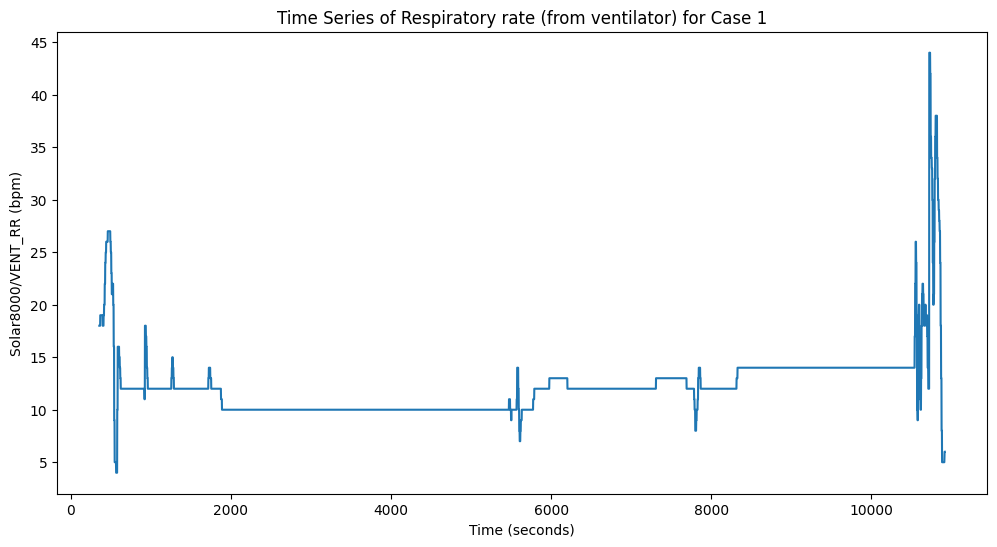

In [10]:
# Drop rows with NaN values in the 'Time' column
test_df_clean = test_df.dropna(subset=['Time'])

# Define x, y, and title based on the data
x = 'Time'
y = test_df_clean.columns[1]
title = f'Time Series of Respiratory rate (from ventilator) for Case 1'

# Create a timeseries plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=test_df_clean, x=x, y=y)
plt.title(title)
plt.xlabel(x + " (seconds)")
plt.ylabel(y + " (bpm)")
plt.show()

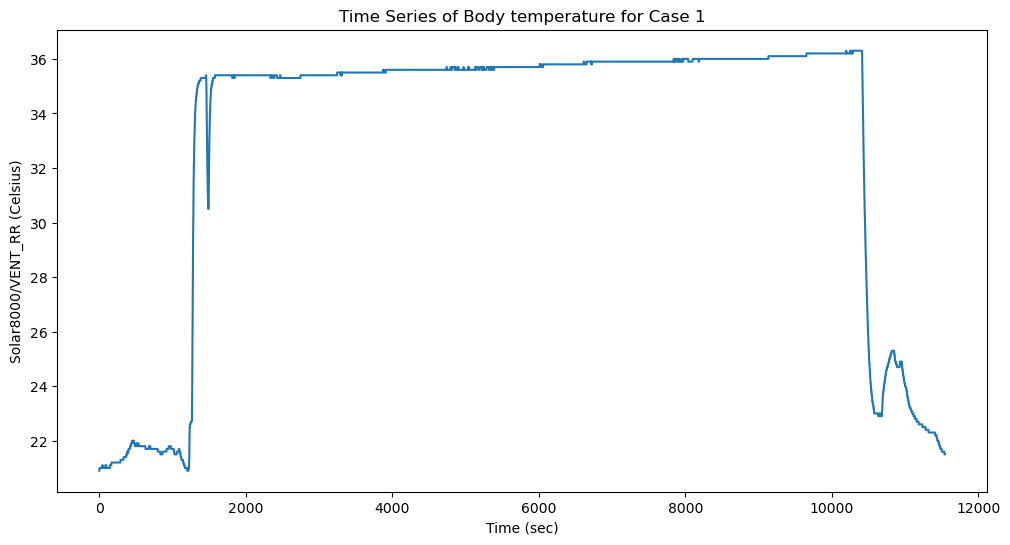

In [16]:
test_df2 = pd.read_csv('https://api.vitaldb.net/55488b14a4f2c1133273a3b8a897f7ee62b24ddc')

# Define x, y, and title based on the data
a = 'Time'
b = test_df2.columns[1]
title = f'Time Series of Body temperature for Case 1'

# Create a timeseries plot
plt.figure(figsize=(12, 6))
sns.lineplot(test_df2, x=a, y=b)
plt.title(title)
plt.xlabel(x + " (sec)")
plt.ylabel(y + " (Celsius)")
plt.show()

## Eddie Exploratory

#### average body temps for two operation types (colorectal and biliary/pancreas) for patients over 80

In [122]:
# body temps for optype = cr vs bp
cr = cases[(cases['optype']=='Colorectal') & (cases['age']>80)]['caseid']
bp = cases[(cases['optype']=='Biliary/Pancreas')& (cases['age']>80)]['caseid']

In [104]:
# cr.size

In [105]:
trks_cr = trks[(trks['tname'] == 'Solar8000/BT') & (trks['caseid'].isin(cr))]
trks_bp = trks[(trks['tname'] == 'Solar8000/BT') & (trks['caseid'].isin(bp))]

In [106]:
trks_cr_api = ['https://api.vitaldb.net/'+ tid for tid in trks_cr['tid']]
trks_bp_api = ['https://api.vitaldb.net/'+ tid for tid in trks_br['tid']]

In [109]:
trks_bp.head(5)

,caseid,tname,tid
26160,344,Solar8000/BT,f737693cfd8f4c247410094062c07a9353c93f77
37544,490,Solar8000/BT,32cdd1e9106679c64e564b0a00ffe6512da6f464
44809,586,Solar8000/BT,6503dbf41b48914087cd159fcd2efbd195dcfbe3
59534,778,Solar8000/BT,2dfdda76deb106f85162ca83ac619c5e99502386
73661,963,Solar8000/BT,67f7abc9603345c5fc3ca0a775e30ed9bdcefbf1


In [108]:
bp_dfs = []

for api_link in trks_bp_api:
    df = pd.read_csv(api_link)
    df = df.rename(columns={'Solar8000/BT': 'BodyTemp'})  # Rename for clarity
    df['Time'] = df['Time'] - df['Time'].min()  # Normalize time (seconds from start)
    df['minute'] = df['Time'] // 60  # Convert time to minutes
    df.groupby('minute')['BodyTemp'].mean()
    bp_dfs.append(df)

In [110]:
cr_dfs = []

for api_link in trks_cr_api:
    df = pd.read_csv(api_link)
    df = df.rename(columns={'Solar8000/BT': 'BodyTemp'})  # Rename for clarity
    df['Time'] = df['Time'] - df['Time'].min()  # Normalize time (seconds from start)
    df['minute'] = df['Time'] // 60  # Convert time to minutes
    df.groupby('minute')['BodyTemp'].mean()
    cr_dfs.append(df)

In [111]:
bp_df = pd.concat(bp_dfs, ignore_index=True)
bp_df = pd.DataFrame(bp_df.groupby('minute')['BodyTemp'].mean())

In [112]:
cr_df = pd.concat(cr_dfs, ignore_index=True)
cr_df = pd.DataFrame(cr_df.groupby('minute')['BodyTemp'].mean())

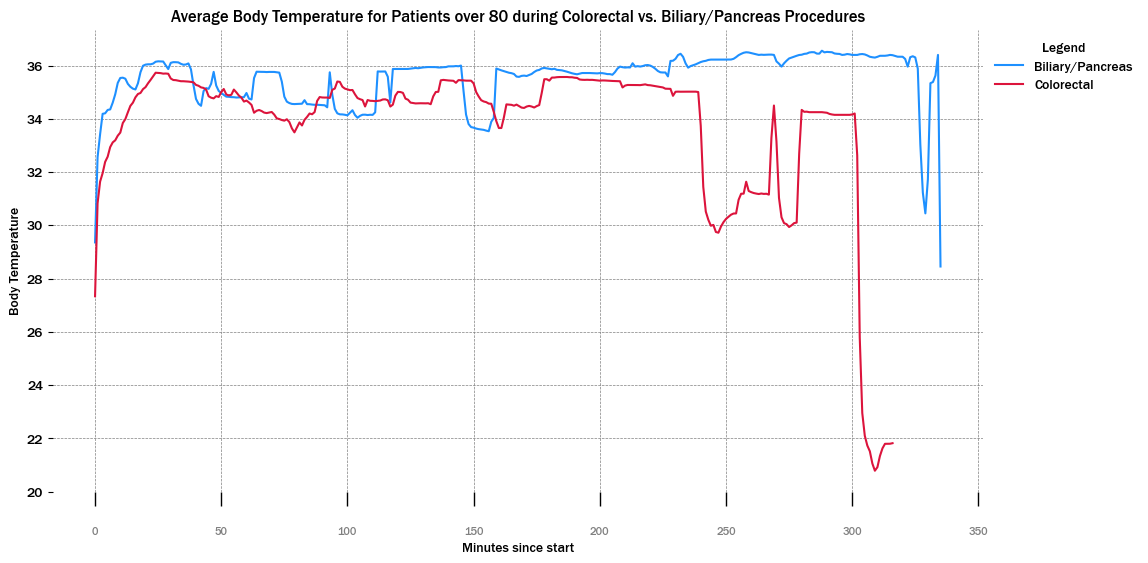

In [123]:
plt.rcParams['font.family'] = 'Franklin Gothic Medium'
fig, ax = plt.subplots(figsize=(12, 6))
# Hide spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

# Customize tick parameters
ax.tick_params(axis='x', which='major', direction='out', length=10, width=1,
               color='black', pad=15, labelsize=8, labelcolor='gray', labelrotation=0)
# Grid
ax.grid(True, which='major', color='gray', linestyle='--', linewidth=0.5)

# Plotting --------------------------------------------------------------------------------------------------------------------------------------
ax.plot(bp_df.index, bp_df['BodyTemp'], label='Biliary/Pancreas', color='dodgerblue')
ax.plot(cr_df.index, cr_df['BodyTemp'], label='Colorectal', color='crimson')
plt.title('Average Body Temperature for Patients over 80 during Colorectal vs. Biliary/Pancreas Procedures')
plt.xlabel('Minutes since start')
plt.ylabel('Body Temperature')


# Legend -------------------------------------------------------------------------------------------------------------------------------
legend = ax.legend(loc='upper left', title='Legend', bbox_to_anchor=(1, 1), frameon=False)
# plt.setp(legend.get_texts(), color='gray', fontproperties=franklin_ita)  # Gray color and no bold
# plt.setp(legend.get_title(), color='black', fontproperties=franklin_ita)  # Gray legend title

plt.savefig('bt_patients_over_80.png')
plt.show()


#### average length of cases by optype in radial form

In [129]:
cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [190]:
cases['opduration'] = (cases['opend']-cases['opstart']) / 60

In [191]:
radial_df = cases[['optype', 'opduration']].groupby('optype').mean()

In [192]:
categories = radial_df.index
values = radial_df['opduration'].values
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
palette = sns.color_palette("ocean", 11)

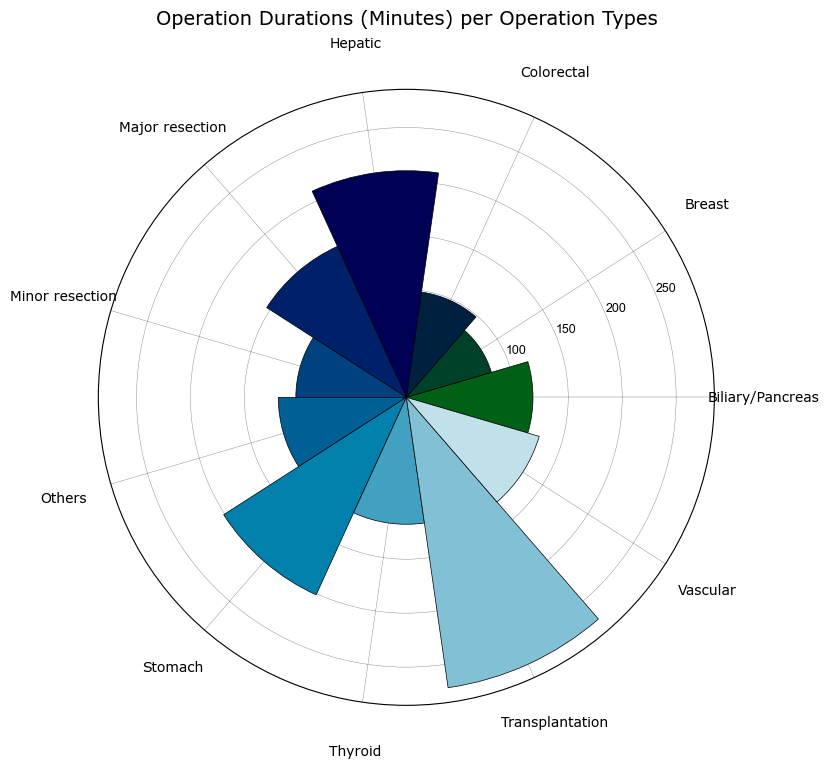

In [205]:
plt.rcParams['font.family'] = 'verdana'
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
# ax.spines['polar'].set_visible(False)

bars = ax.bar(angles, values, width=2 * np.pi / len(categories), alpha=1, color=palette, zorder=3, edgecolor='black',lw=.5)

ax.set_xticks(angles)
ax.set_xticklabels(categories, fontsize=10, ha='center')

yticks = ax.get_yticks()
ax.set_yticks(yticks)  
ax.set_yticklabels([f"{int(tick)}" for tick in yticks], fontsize=9, fontweight='normal', fontname='Arial')
ax.xaxis.set_tick_params(pad=25)

# Set radial limits
ax.set_ylim(0, max(values) * 1.05)
ax.grid(alpha=0.5, color='black', lw=.3, zorder=1)
# Title
ax.set_title("Operation Durations (Minutes) per Operation Types", va='bottom', fontsize=14)

plt.show()

In [209]:
cases['opname'].unique()

array(['Low anterior resection', 'Subtotal gastrectomy',
       'Cholecystectomy', 'Distal gastrectomy', 'Aneurysmal repair',
       'Lung lobectomy', 'Breast-conserving surgery',
       'Transurethral resection of bladder tumor',
       'Liver transplantation', 'Metastasectomy', 'Hernia repair',
       'Liver segmentectomy', 'Transanal excision',
       'Pylorus preserving pancreaticoduodenectomy', 'Anterior resection',
       'Total thyroidectomy', 'Gastric wedge resection',
       'Total gastrectomy', 'Thymectomy', 'Donor hepatectomy',
       'Lung wedge resection', 'Nephrectomy', 'Fistulectomy',
       'Abdominoperineal resection', 'Kidney transplantation',
       'Radical prostatectomy', 'Donor nephrectomy', 'Hemihepatectomy',
       'Ileostomy repair', 'Diagnostic laparoscopy',
       'Radical hysterectomy', 'Bullectomy', 'Excision',
       'Thyroid lobectomy', 'Small bowel segmental resection',
       'Appendectomy', 'Colostomy', 'Adrenalectomy',
       'Debridement of wound', '

In [24]:
# Cleaning
cases = pd.read_csv('data/cases.csv')
results = pd.read_csv('data/results.csv')
trks = pd.read_csv('data/trks.csv')
viz = pd.read_csv('data/viz_cases.csv')


In [25]:
cases.columns


Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca'],
     

In [26]:
# first, cases
# steps: keep, filter, create new columns

# columns im interested in keeping:
cases_clean = cases[["caseid", 
                    "subjectid", 
                    "casestart", 
                    "caseend", 
                    "anestart", 
                    "aneend", 
                    "opstart", 
                    "opend", 
                    "age",
                    "sex",
                    "height",
                    "weight",
                    "emop",
                    "department",
                    "optype",
                    "dx",
                    "opname",
                    "approach",
                    "position",
                    "ane_type",
                    "adm",
                    "dis",
                    "icu_days",
]]

In [27]:
cases_clean.describe()
# slider with age


,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,age,height,weight,emop,adm,dis,icu_days
count,6388.000000,6388.000000,6388.0,6388.000000,6388.000000,6.388000e+03,6388.000000,6388.000000,6388.000000,6388.000000,6388.000000,6388.000000,6.388000e+03,6.388000e+03,6388.000000
mean,3194.500000,3047.726362,0.0,11348.680651,-757.002974,-5.666559e+05,2188.399029,10347.526769,57.296493,162.188832,61.484922,0.122417,-8.543255e+05,5.050752e+04,0.552755
std,1844.201092,1757.857225,0.0,6658.506842,783.520044,4.618684e+07,995.381670,6602.562588,14.976461,9.905329,11.945135,0.327792,4.610906e+07,4.613061e+07,3.412307
min,1.000000,1.000000,0.0,1640.000000,-19065.000000,-3.691470e+09,0.000000,786.000000,0.300000,42.000000,4.800000,0.000000,-3.685366e+09,-3.685366e+09,0.000000
25%,1597.750000,1532.750000,0.0,6194.500000,-1090.250000,6.013750e+03,1440.000000,5253.750000,48.000000,156.100000,53.300000,0.000000,-2.250750e+05,2.086800e+05,0.000000
50%,3194.500000,3053.500000,0.0,9924.500000,-583.000000,9.769500e+03,2055.000000,8877.000000,59.000000,162.200000,60.500000,0.000000,-2.010600e+05,3.932400e+05,0.000000
75%,4791.250000,4569.250000,0.0,15072.750000,-277.000000,1.492950e+04,2779.000000,14014.000000,68.000000,168.700000,68.700000,0.000000,-1.293000e+05,6.496500e+05,0.000000
max,6388.000000,6090.000000,0.0,62494.000000,1984.000000,1.107090e+05,13461.000000,60697.000000,94.000000,188.600000,139.700000,1.000000,-7.200000e+02,1.930788e+07,179.000000


In [ ]:
# Convert start and end columns to duration columns, in hours
cases_clean['case_duration'] = (cases_clean['caseend'] - cases_clean['casestart']) / 3600
cases_clean['ane_duration'] = (cases_clean['aneend'] - cases_clean['anestart']) / 3600
cases_clean['op_duration'] = (cases_clean['opend'] - cases_clean['opstart']) / 3600

# Drop the original start and end columns
cases_clean.drop(columns=['casestart', 'caseend', 'anestart', 'aneend', 'opstart', 'opend'], inplace=True)

cases_clean.head()

/var/folders/39/pbkz55tn77x5j29wl0sjvkn40000gn/T/ipykernel_22804/3120698621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_clean['case_duration'] = (cases_clean['caseend'] - cases_clean['casestart']) / 3600
/var/folders/39/pbkz55tn77x5j29wl0sjvkn40000gn/T/ipykernel_22804/3120698621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_clean['ane_duration'] = (cases_clean['aneend'] - cases_clean['anestart']) / 3600
/var/folders/39/pbkz55tn77x5j29wl0sjvkn40000gn/T/ipykernel_22804/3120698621.py:

,caseid,subjectid,age,sex,height,weight,emop,department,optype,dx,opname,approach,position,ane_type,adm,dis,icu_days,case_duration,ane_duration,op_duration
0,1,5955,77.0,M,160.2,67.5,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,-236220,627780,0,3.206111,3.166667,2.416667
1,2,2487,54.0,M,167.3,54.8,0,General surgery,Stomach,Advanced gastric cancer,Subtotal gastrectomy,Open,Supine,General,-221160,1506840,0,4.372500,4.433333,3.583333
2,3,2861,62.0,M,169.1,69.7,0,General surgery,Biliary/Pancreas,Gallbladder stone,Cholecystectomy,Videoscopic,Reverse Trendelenburg,General,-218640,40560,0,1.220556,1.333333,0.533333
3,4,1903,74.0,M,160.6,53.0,0,General surgery,Stomach,Advanced gastric cancer,Distal gastrectomy,Videoscopic,Reverse Trendelenburg,General,-201120,576480,1,5.830556,5.833333,4.250000
4,5,4416,66.0,M,171.0,59.7,1,General surgery,Vascular,Aortic aneurysm,Aneurysmal repair,Open,Prone,General,-67560,3734040,13,5.980833,6.500000,4.916667


In [29]:
cases_clean.to_csv('data/cases_clean.csv', index=False)